In [1]:
from slmfunctions.dependencies import *
from slmfunctions.settings import *
from slmfunctions.simulation import *
from slmfunctions.imageprocessing import *
from slmfunctions.phaseretrieval import *
from slmfunctions.slmsuite.slmsuite.holography.analysis import *


# GLOBAL VARIABLES
numpixels = 1300
slmwidth = 1200
slmheight = 1920

cupy not installed. Using numpy.


In [2]:
imgname = f"10by10_9spacing_mag3grid" # LOOKUP NAME
load_dir = r'Z:\nsong\NeutralAtoms\Ultracold-Research\GWS_Summer2024\storage'  # For PC
# load_dir = r'C:\cleen\nsong\2-Research\UAC Research\Github\Ultracold-Research\GWS-Summer2024\storage' # For laptop

# Local laptop stroage
load_dir = r'C:\cleen\nsong\2-Research\UAC Research\Github\ColdStorage'

optimizedout_tweezer = load_from_file(load_dir, f'tweezers{imgname}')
optimizedout_anchors = load_from_file(load_dir, f'anchors{imgname}')

Object loaded from C:\cleen\nsong\2-Research\UAC Research\Github\ColdStorage\tweezers10by10_9spacing_mag3grid.pkl
Object loaded from C:\cleen\nsong\2-Research\UAC Research\Github\ColdStorage\anchors10by10_9spacing_mag3grid.pkl


In [3]:
precisetweezerim = remove0thorder(simulatefourier(zeropad(optimizedout_tweezer.get_slmphase(),4096-1300), magnification=1),100)
simulatedcamimage_pre = zoomin(precisetweezerim, 1000)
print(zoomin_getcoords(precisetweezerim, 10000))

[1895, 2192, 2264, 2560]


In [4]:
preciseanchorim = remove0thorder(simulatefourier(zeropad(optimizedout_anchors.get_slmphase(),4096-1300), magnification=1),100)
simulatedcamimage_anchor_pre = zoomin(preciseanchorim, 10000)
print(zoomin_getcoords(preciseanchorim, 10000))

[1894, 2193, 2262, 2562]


In [5]:
simulatedcamimage = np.pad(rotate_image(precisetweezerim[1894:2193, 2262:2562], 0.05), ((30,10), (20, 80)), mode='constant', constant_values = 0)
simulatedcamimage_anchor =np.pad(rotate_image(preciseanchorim[1894:2193, 2262:2562],0.05), ((30,10), (20,80)),mode='constant', constant_values = 0)

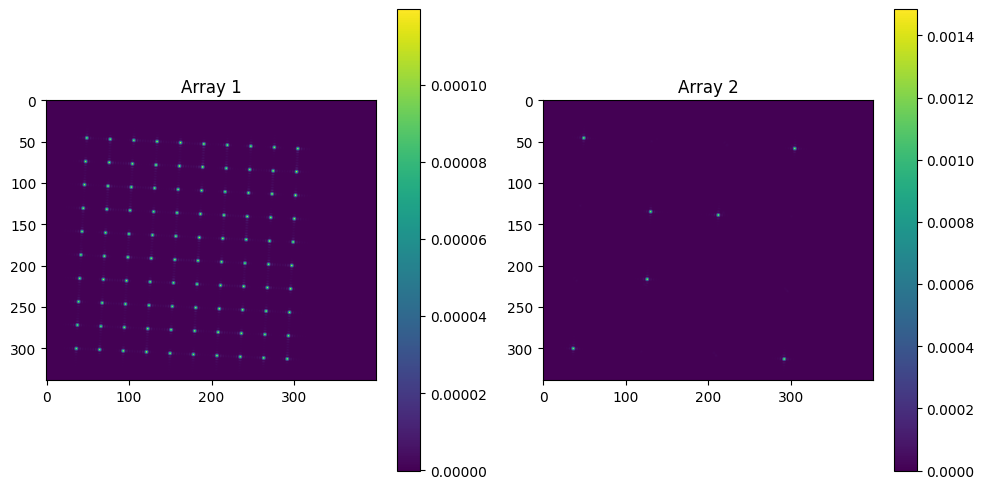

In [6]:
plot_arrays([simulatedcamimage, simulatedcamimage_anchor])

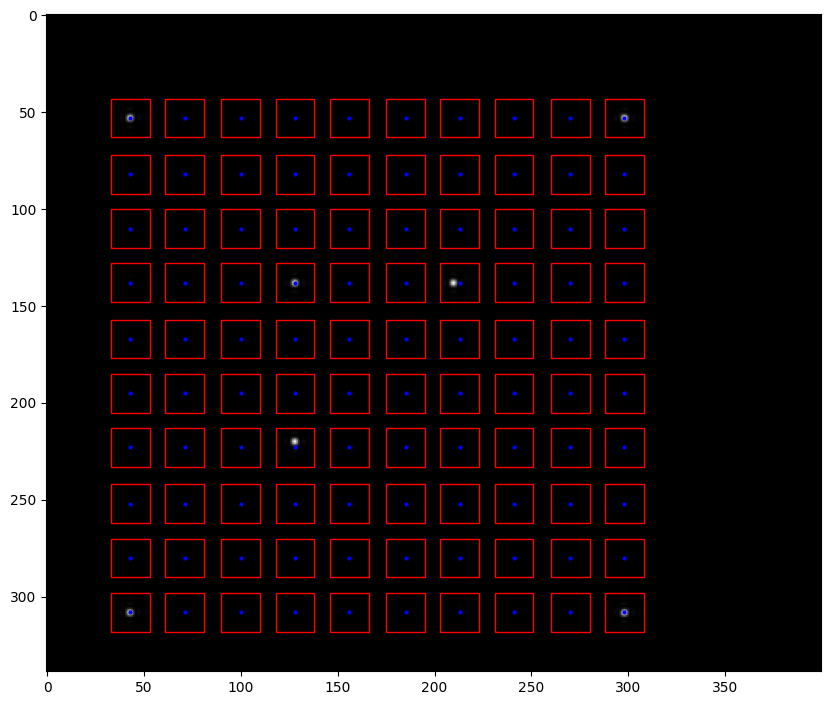

In [7]:
image = adjustimage(simulatedcamimage_anchor, rotateby90=0, fliphorizontal = False, flipvertical=False)
rotateby90, fliphorizontal, flipvertical = 0, False, False

gridsize = get_gridsize(optimizedout_tweezer.get_targetim())
camerablobs = blob_detect(simulatedcamimage_anchor)
corners = identifycorners(camerablobs)
angle = calculateangle(simulatedcamimage_anchor)
refinedcamimage_anchor = rotate_image(simulatedcamimage_anchor, angle)
empty_tweezerregions, empty_tweezercenters = definetweezerregions(refinedcamimage_anchor, gridsize, N = 20)
plot_tweezerregions(refinedcamimage_anchor, empty_tweezerregions, empty_tweezercenters)


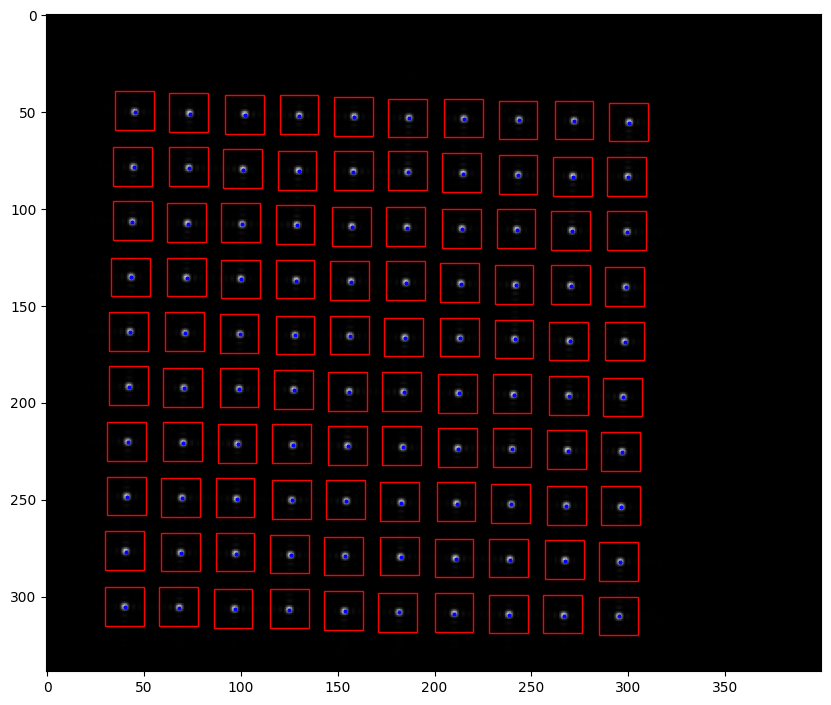

In [17]:
refinedcamimage_tweezer = rotate_image(simulatedcamimage, angle+0.02)
goodnessoffit, refined_tweezercenters, tweezerregions, tweezerpower = extract_regions(refinedcamimage_tweezer, empty_tweezercenters, N = 16, retrievemax=False)
plot_tweezerregions(refinedcamimage_tweezer, empty_tweezerregions, refined_tweezercenters)


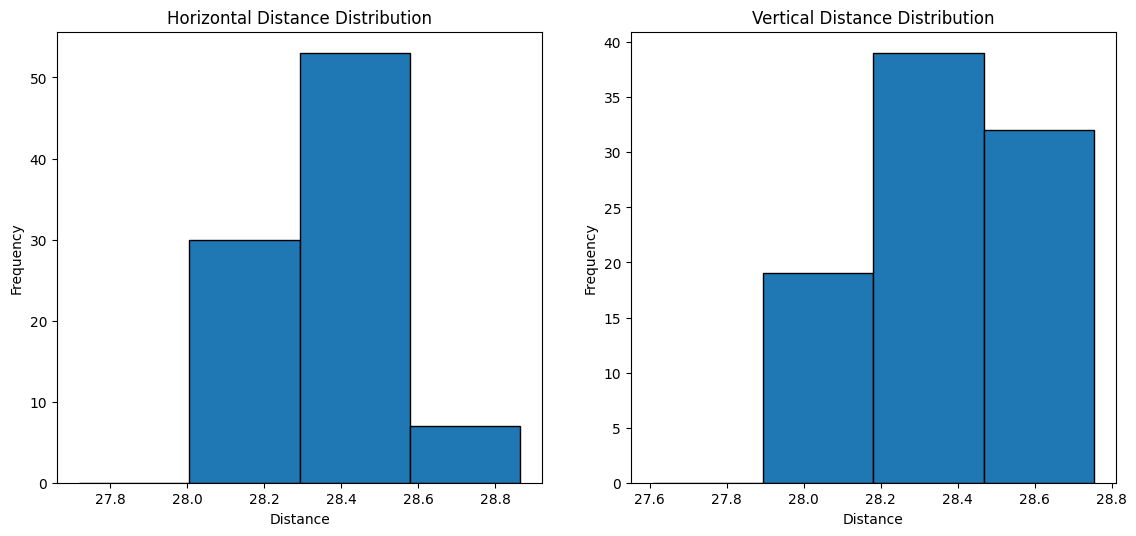

In [18]:
tweezers_hordist, tweezers_vertdist = calculate_distances_centers(refined_tweezercenters, gridsize)
plots = plot_distance_distribution(tweezers_hordist, tweezers_vertdist, 1)


In [19]:
scaledregions = map_regions_to_3x3(tweezerregions, 4)
mappedblobs_int = map_cameratotargetint_delta(tweezerpower, optimizedout_tweezer.get_uniformtarget(), gridsize)
mappedblobs_region = map_cameratotargetin_3by3regions(scaledregions, optimizedout_tweezer.get_uniformtarget(), gridsize)


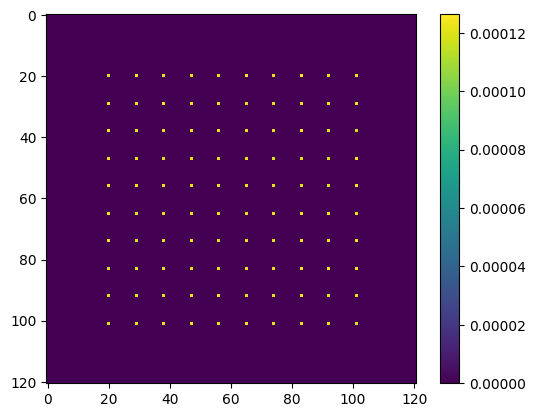

In [22]:
plt.imshow(zoomin(mappedblobs_int))
plt.colorbar()

In [21]:
tweezerpower

array([[0.00011855, 0.00011953, 0.00012078, 0.00012052, 0.00012027,
        0.00012351, 0.00012184, 0.00012136, 0.00012248, 0.00012514],
       [0.00011936, 0.00012223, 0.00012155, 0.00012156, 0.00012084,
        0.00012652, 0.00012201, 0.00012179, 0.0001248 , 0.00012549],
       [0.0001191 , 0.00012136, 0.00011975, 0.00012376, 0.00012065,
        0.00012056, 0.00012057, 0.00012116, 0.00012449, 0.00012392],
       [0.00011925, 0.0001218 , 0.00012146, 0.00012083, 0.00012052,
        0.00012073, 0.00012169, 0.00012508, 0.00012306, 0.00012403],
       [0.00011941, 0.00011952, 0.00012023, 0.00012045, 0.00012031,
        0.00012166, 0.00012178, 0.0001244 , 0.00012429, 0.0001235 ],
       [0.00011825, 0.00011926, 0.00012011, 0.00012121, 0.00012281,
        0.00012192, 0.0001214 , 0.00012191, 0.00012448, 0.00012453],
       [0.00011894, 0.00012088, 0.00012109, 0.00012006, 0.00012222,
        0.00012038, 0.00012226, 0.00012411, 0.00012384, 0.00012318],
       [0.00011843, 0.00012012, 0.0001193